# Breast Cancer Diagnosis

Dataset source - [kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Import modules

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [2]:
# Read data
df = pd.read_csv("./data/data.csv")
# display all columns
pd.set_option('display.max_columns', 500)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

## Exploratory data analysis

Diagnosis:
M - malignant
B - benign

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

32 столбец полностью пустой и его можно удалить.
Во всех остальных данных пропусков нет.

In [4]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

Посмотрим основные статистики данных

In [5]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

Преобразуем данные, чтобы было удобнее строить графики

In [8]:
features = ['radius', 'texture', 'perimeter', 
                'area', 'smoothness', 'compactness', 
                'concavity', 'concave points', 'symmetry', 
                'fractal_dimension']

long_df = pd.wide_to_long(df, stubnames=features, 
                          i=['id', 'diagnosis'], j='stat', 
                          sep='_', suffix=r'\w+').reset_index().\
                        melt(id_vars=['id', 'diagnosis', 'stat'], 
                             var_name='feature')
long_df.head()

id diagnosis   stat feature    value
0  842302         M   mean  radius  17.9900
1  842302         M     se  radius   1.0950
2  842302         M  worst  radius  25.3800
3  842517         M   mean  radius  20.5700
4  842517         M     se  radius   0.5435

### Distributions

Распределения признаков. Они должны быть близки к нормальному, как в большинстве случаев в естественном мире.

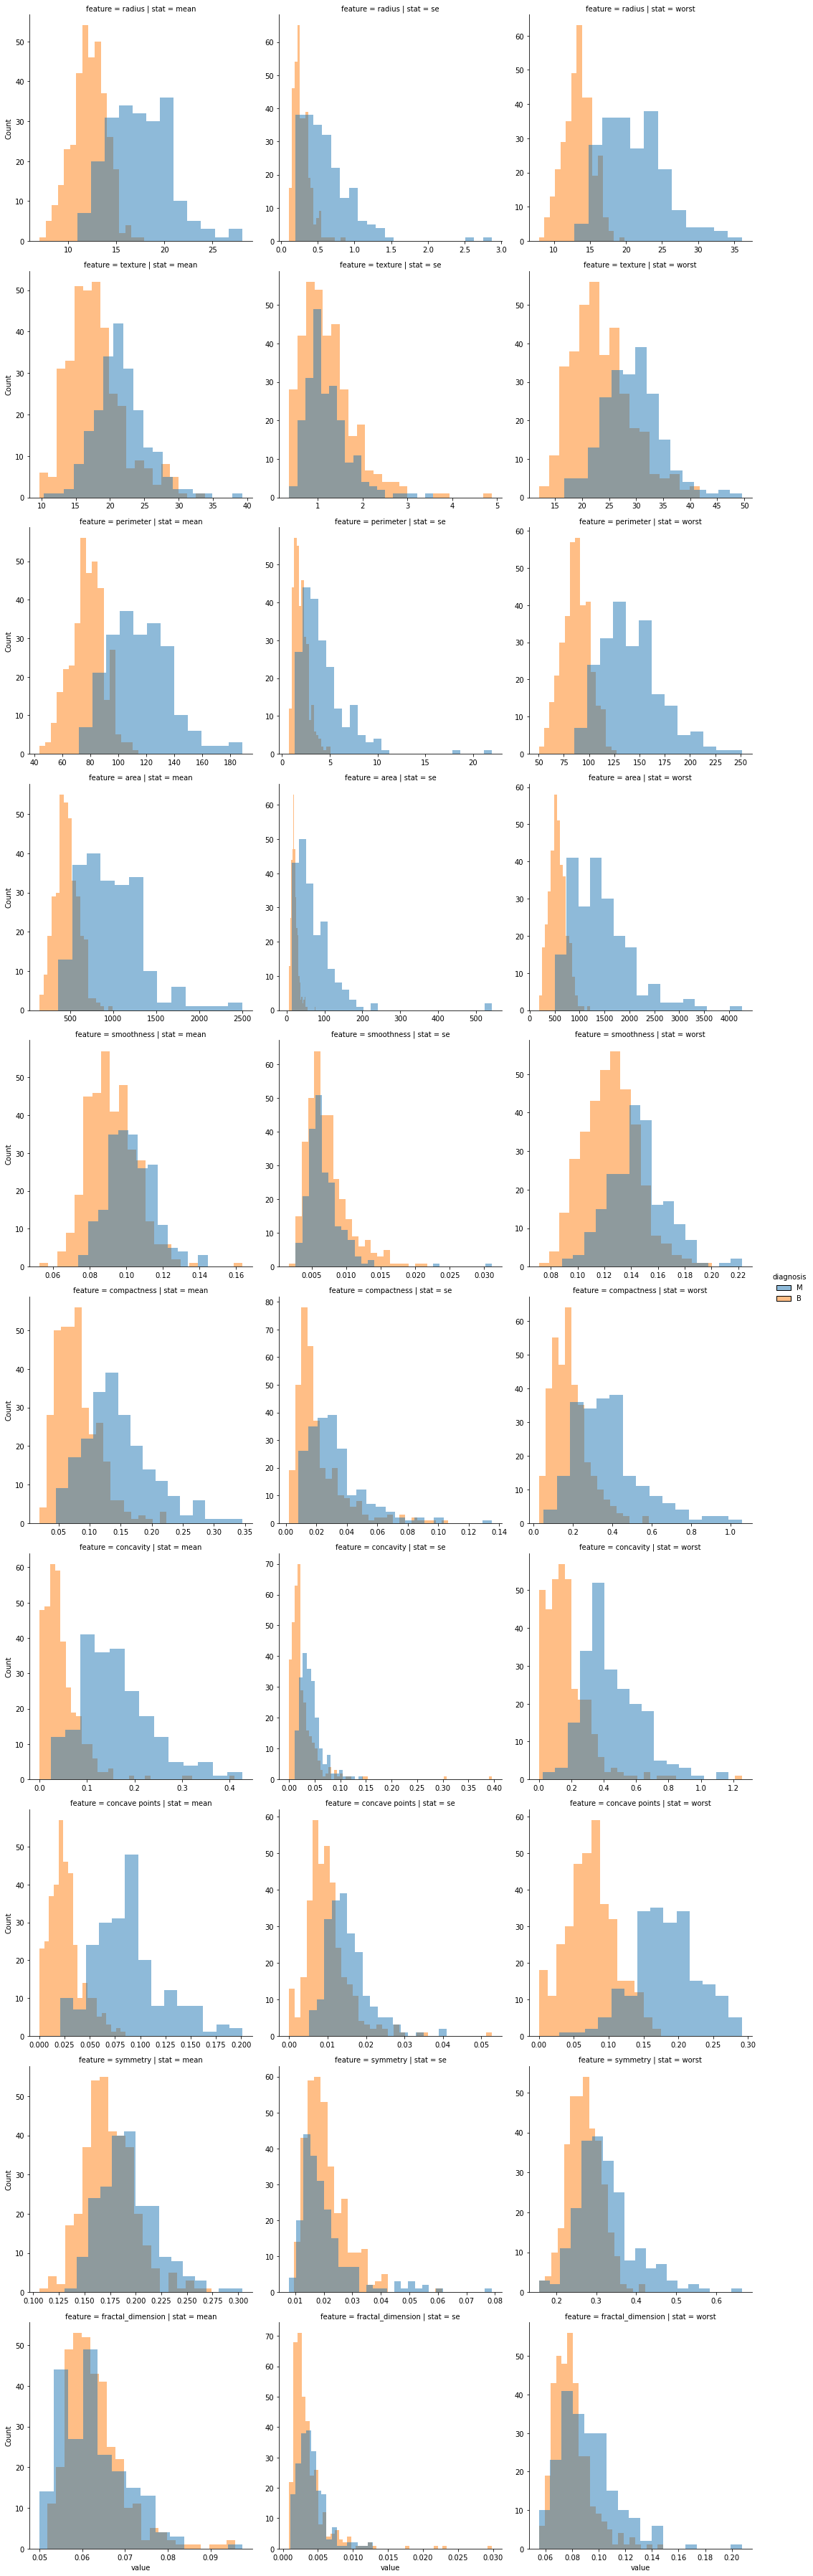

In [32]:
sns.displot(data=long_df, x='value', hue='diagnosis', 
            col='stat', row='feature', kind='hist', 
            facet_kws={'sharey':False, 'sharex': False}, 
            common_bins=False)
plt.show()

### Correlation

Нарисуем HeatMap корреляций. Т.к. даных много мы отобразим все порциями 10 х 10

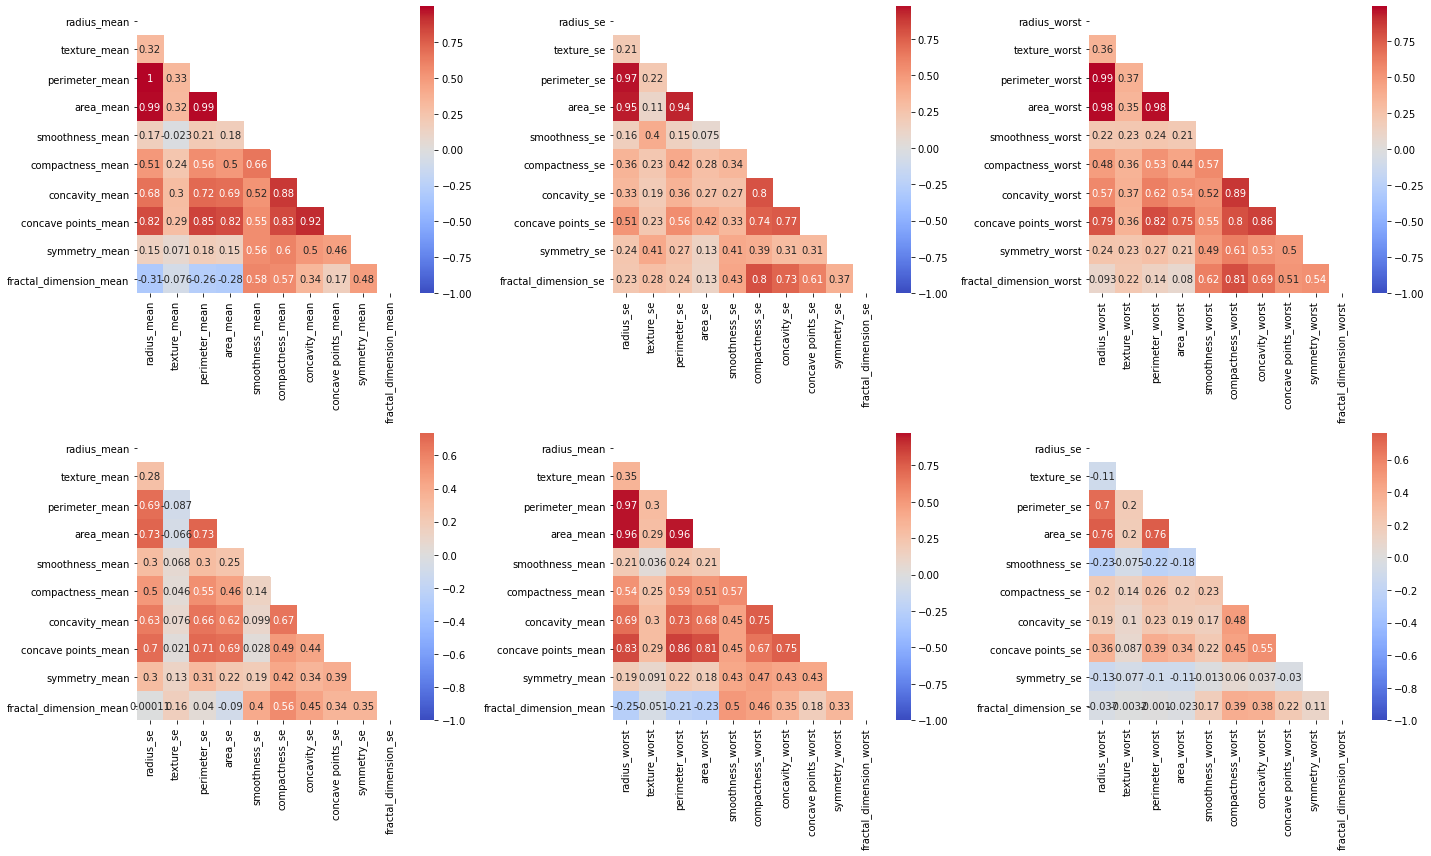

In [101]:
# Calculate correlation
corr = df.drop('id', axis=1).corr()
# Create Figure and set parameters
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(20, 12)
# Create pallete
pal = sns.color_palette("coolwarm", 10000)
# Division of rows and columns in correlation matrix to construct parts of heatmap
rows = [(0, 10), (10, 20), (20, 30), (0, 10), (0, 10), (10, 20)]
cols = [(0, 10), (10, 20), (20, 30), (10, 20), (20, 30), (20, 30)]
# Mask
mask = np.triu(np.ones((10, 10), dtype=np.bool))
# Visualize
for row, col, ax in zip(rows, cols, axes.flatten()):
    corr_part = corr.iloc[row[0]:row[1], col[0]:col[1]]
    sns.heatmap(corr_part, annot=True, cmap=pal, mask=mask, vmin=-1, center=0, ax=ax)
# Automatically adjust subplots layout
fig.tight_layout()
plt.show()

Отберем признаки с высокой корреляцией ($\geq 0.6$)

In [151]:
# Initialize dictionary {column_name: highly correlated columns list}
high_corr = dict()
# Threshold value for cor
thres_r = 0.6
# Get highly correlated values
for i, row in corr.reset_index(drop=True).iterrows():
    # select rows to avoid repeatition
    r = row[i+1:]
    # get correlated column names
    hr = list(r[np.abs(r) >= thres_r].index)
    # ignore empty lists
    if len(hr) != 0:
        high_corr[row.index[i]] = list(r[r >= thres_r].index)
#high_corr

Построим scatter plot между отобранными колонками. Чтобы лучше увидеть характер зависимости визуализируем x vs. y и y vs. x

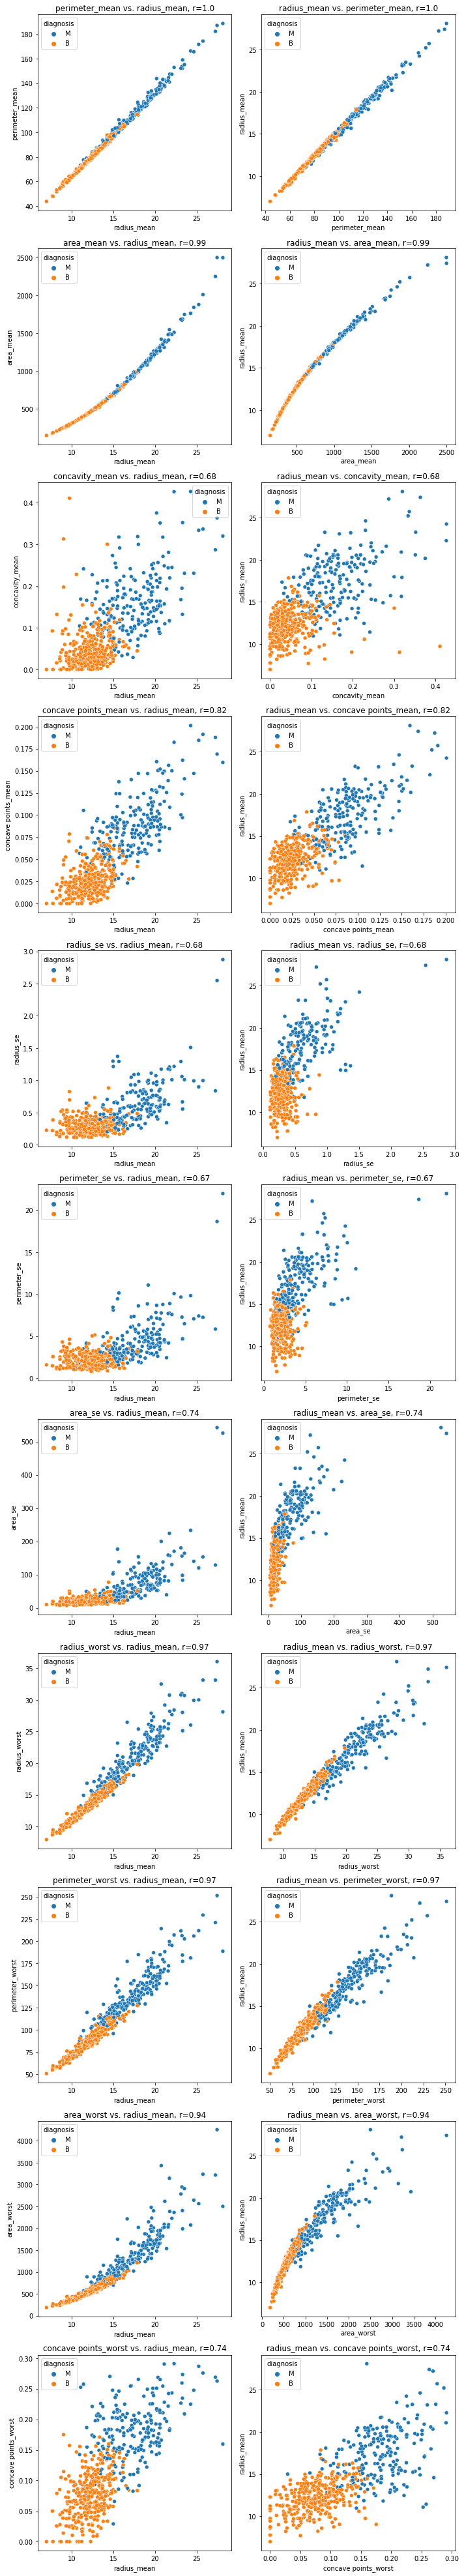

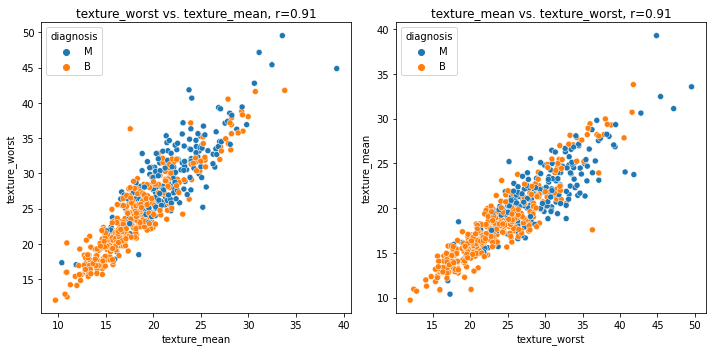

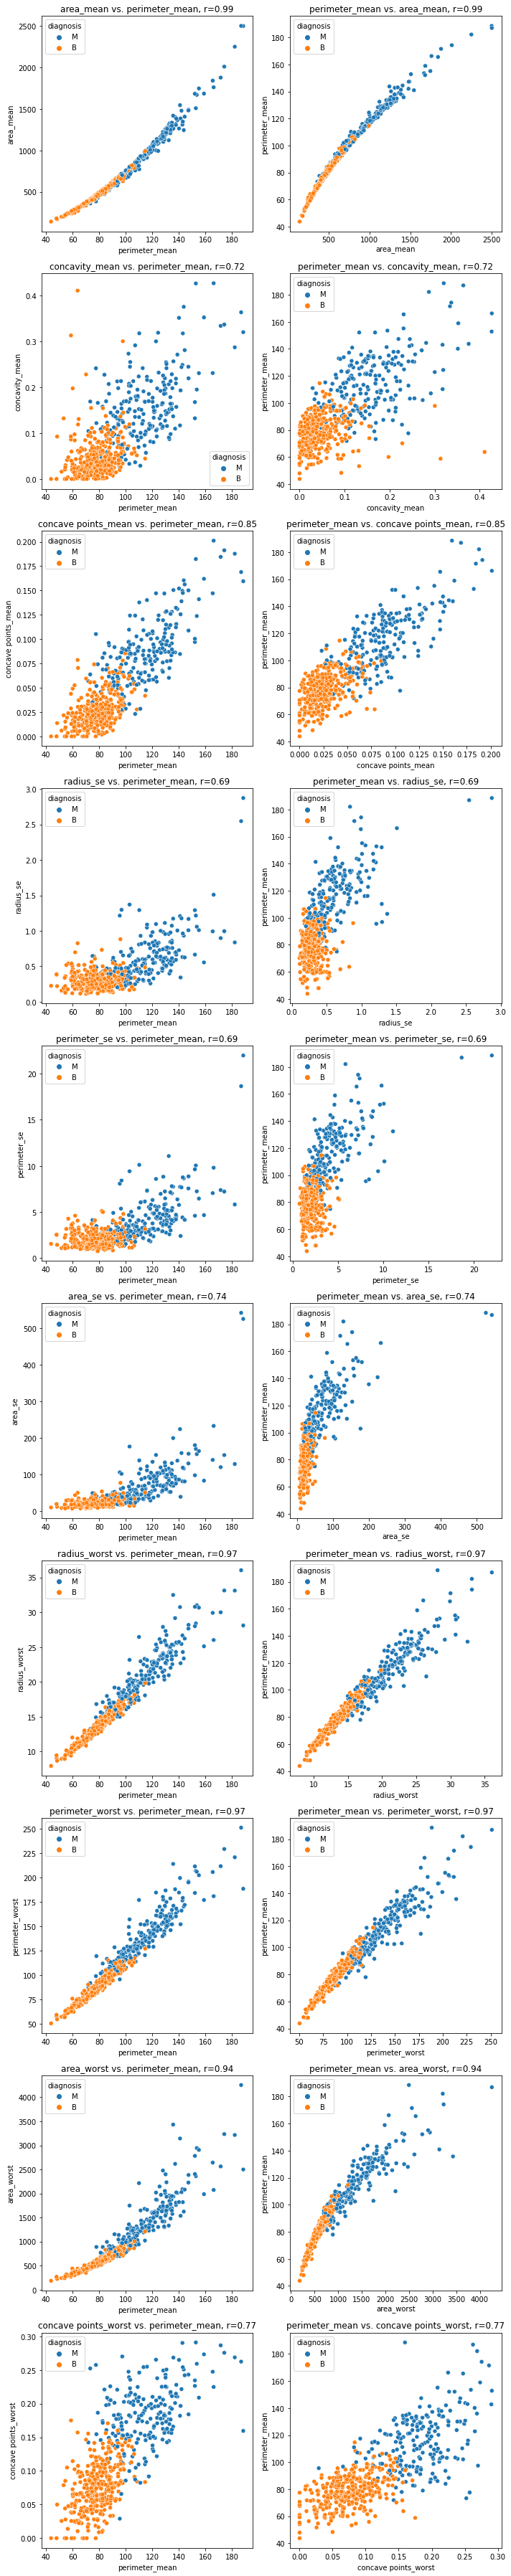

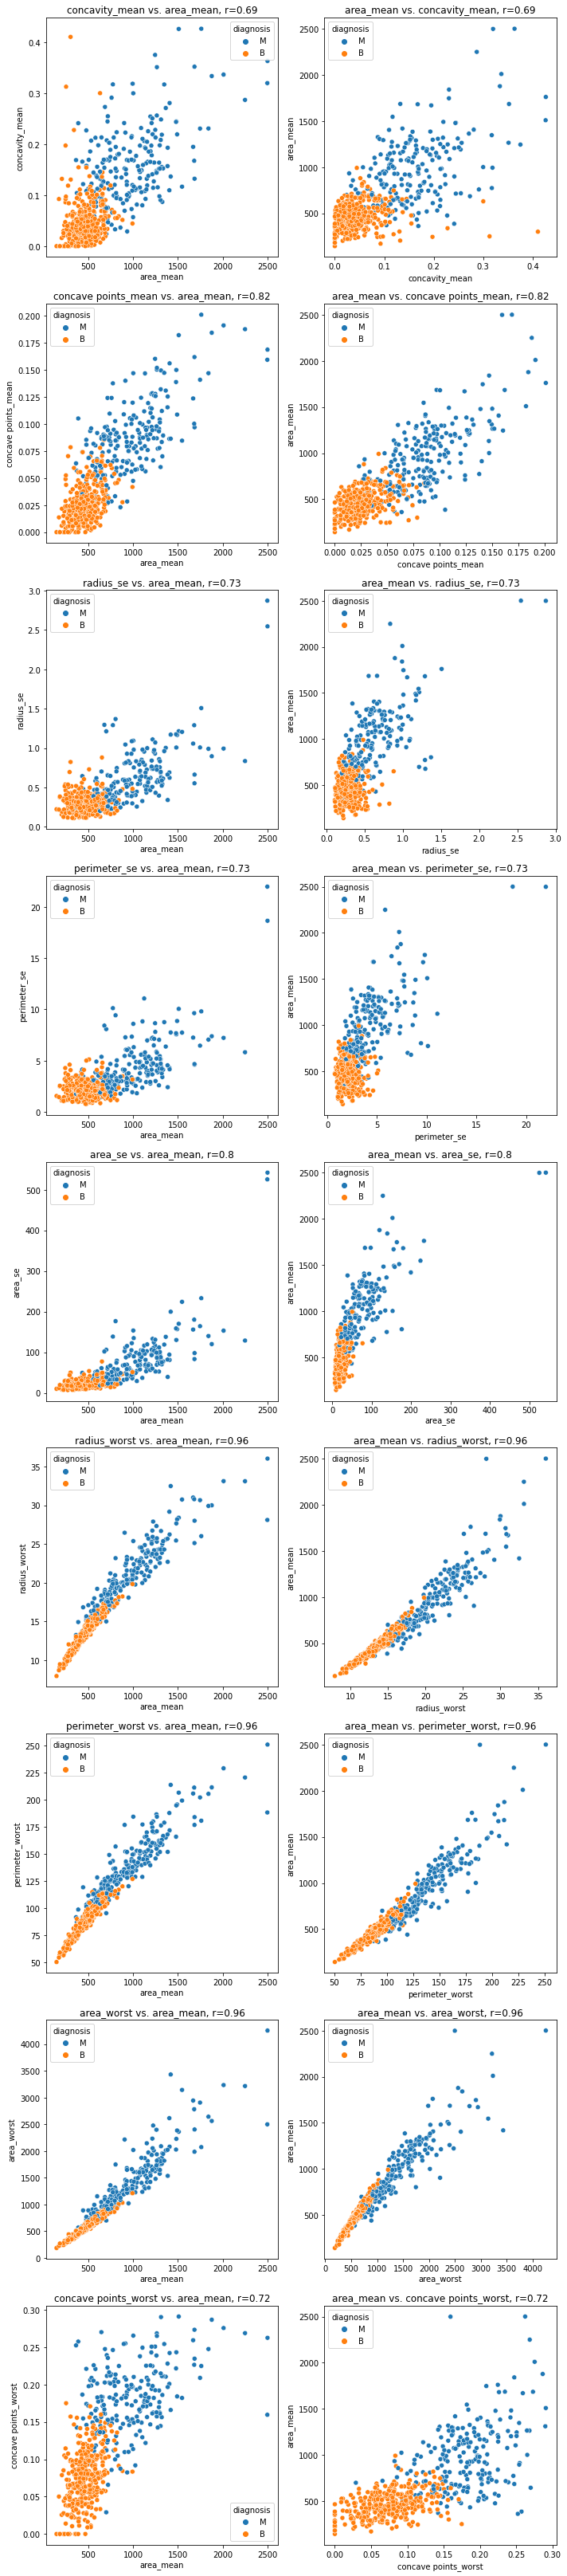

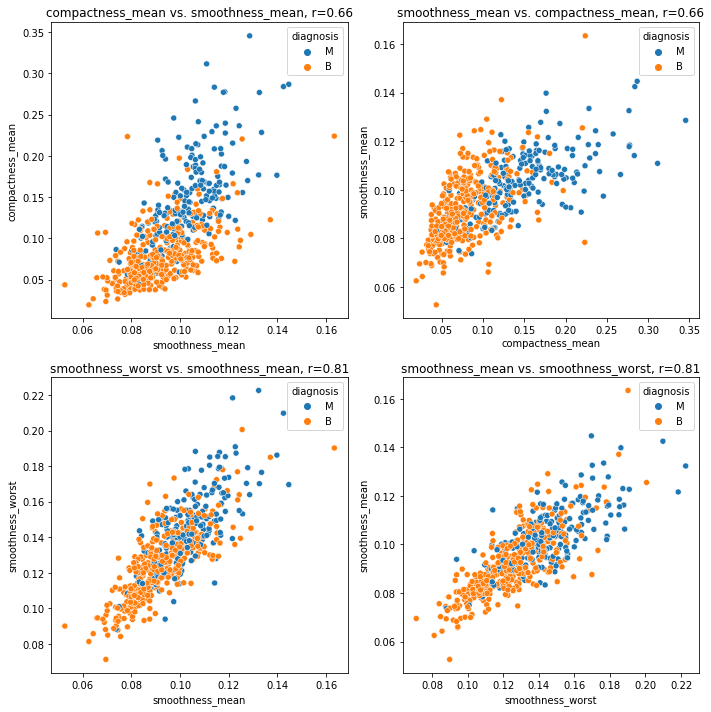

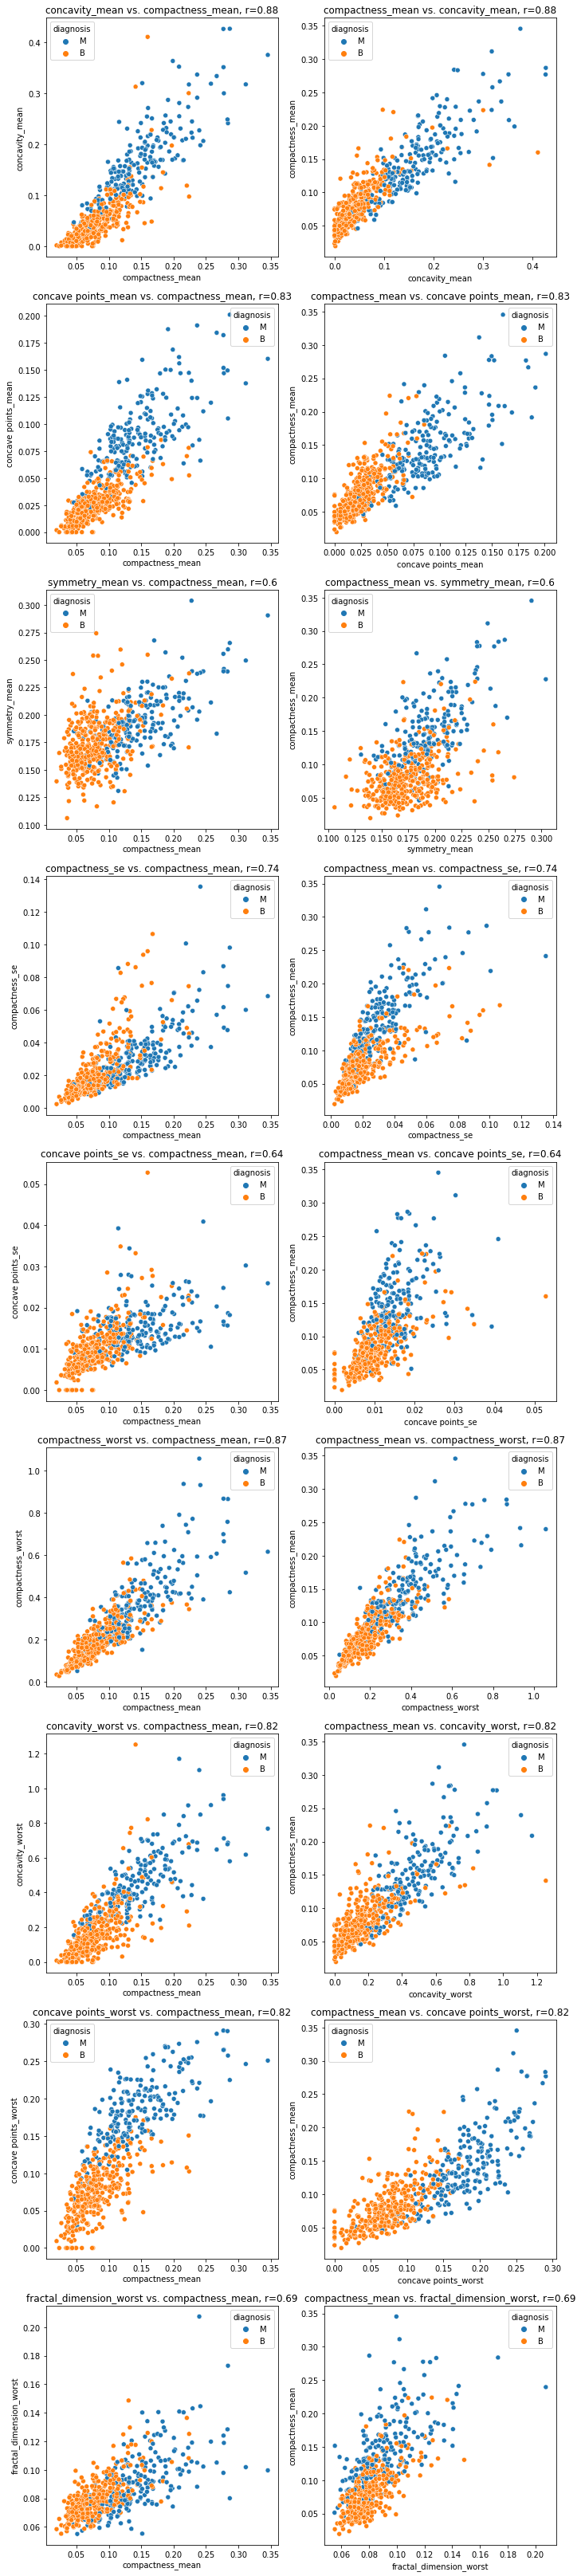

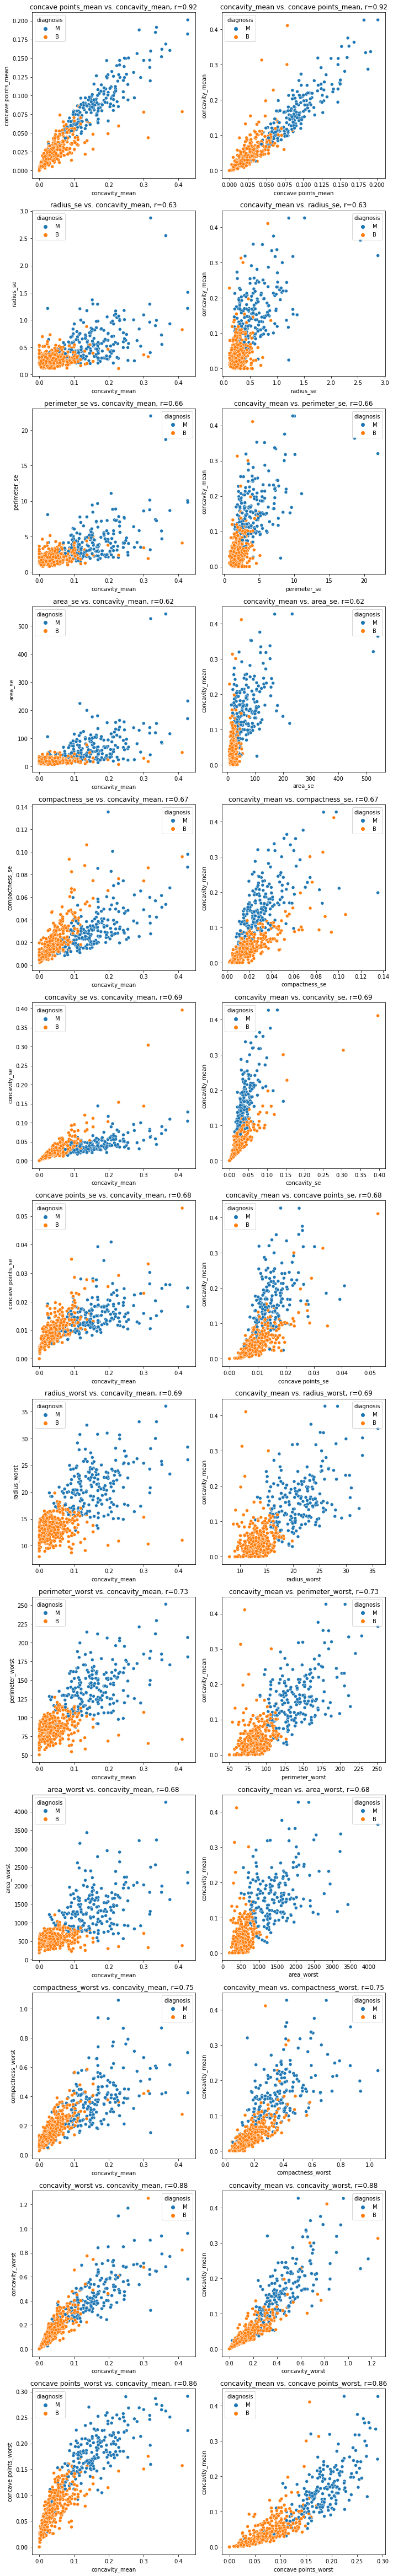

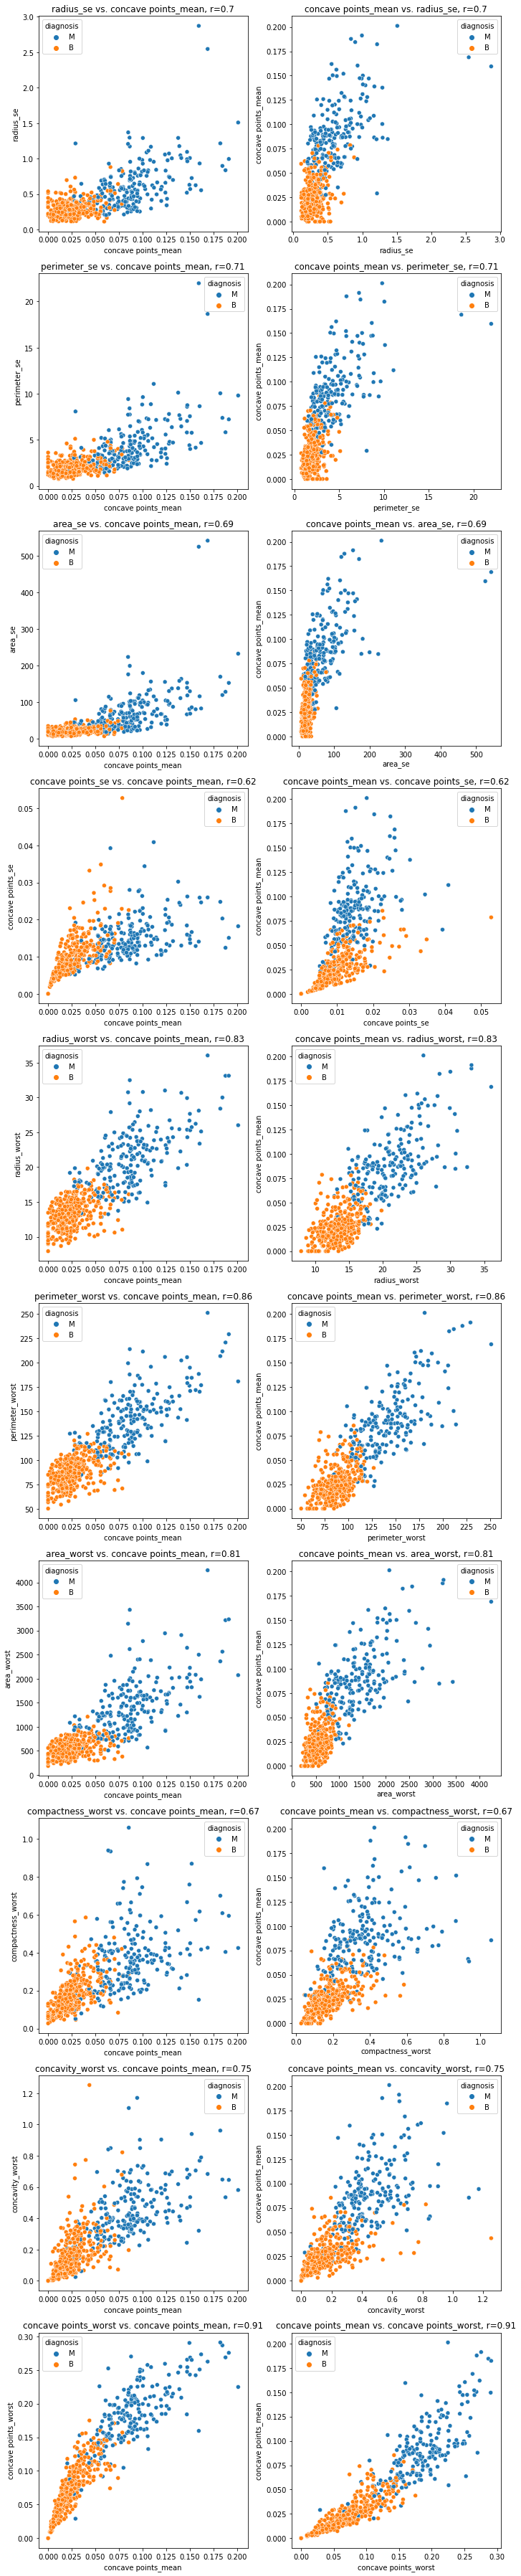

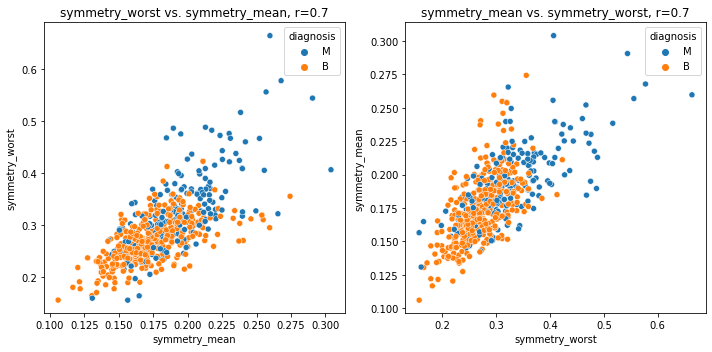

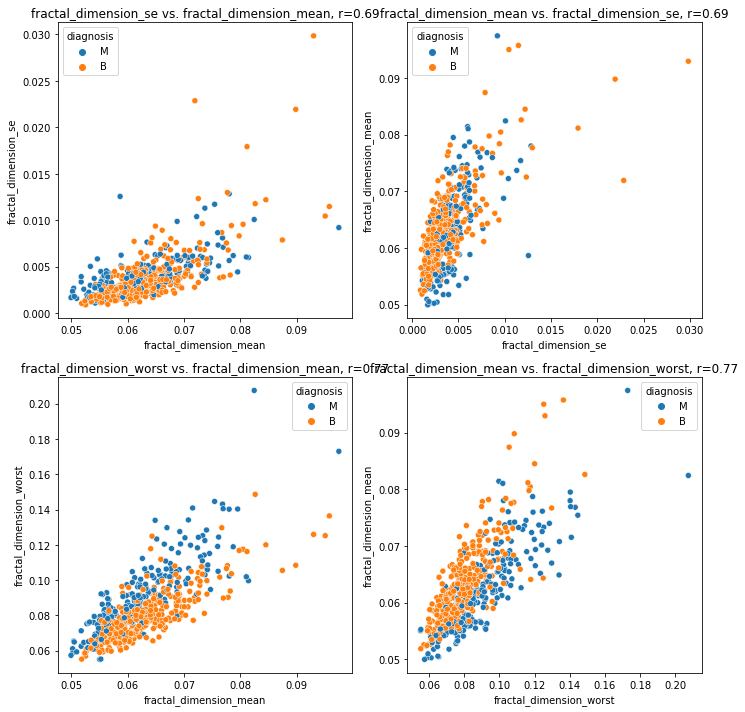

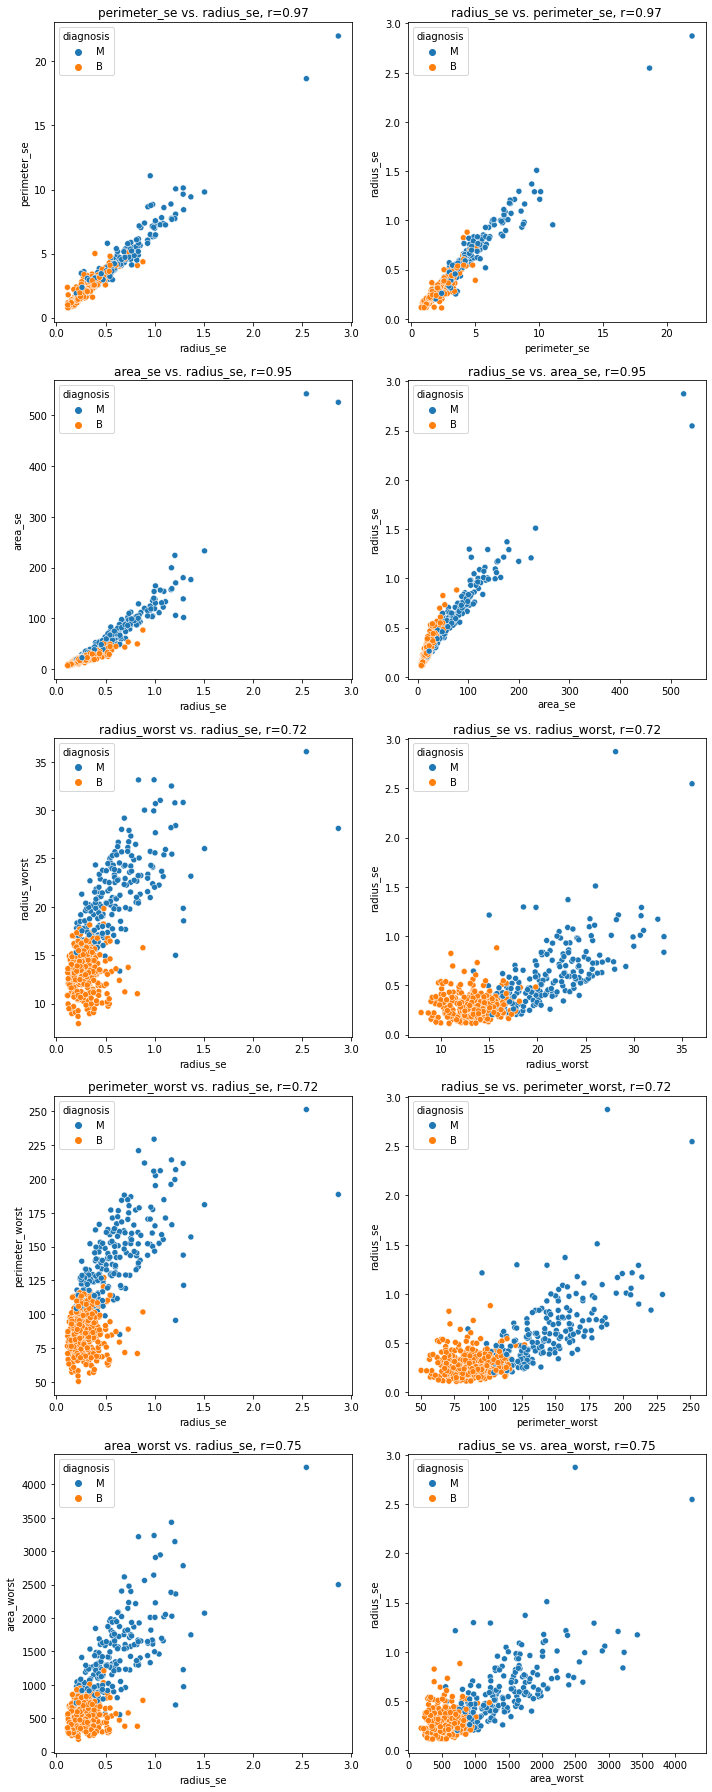

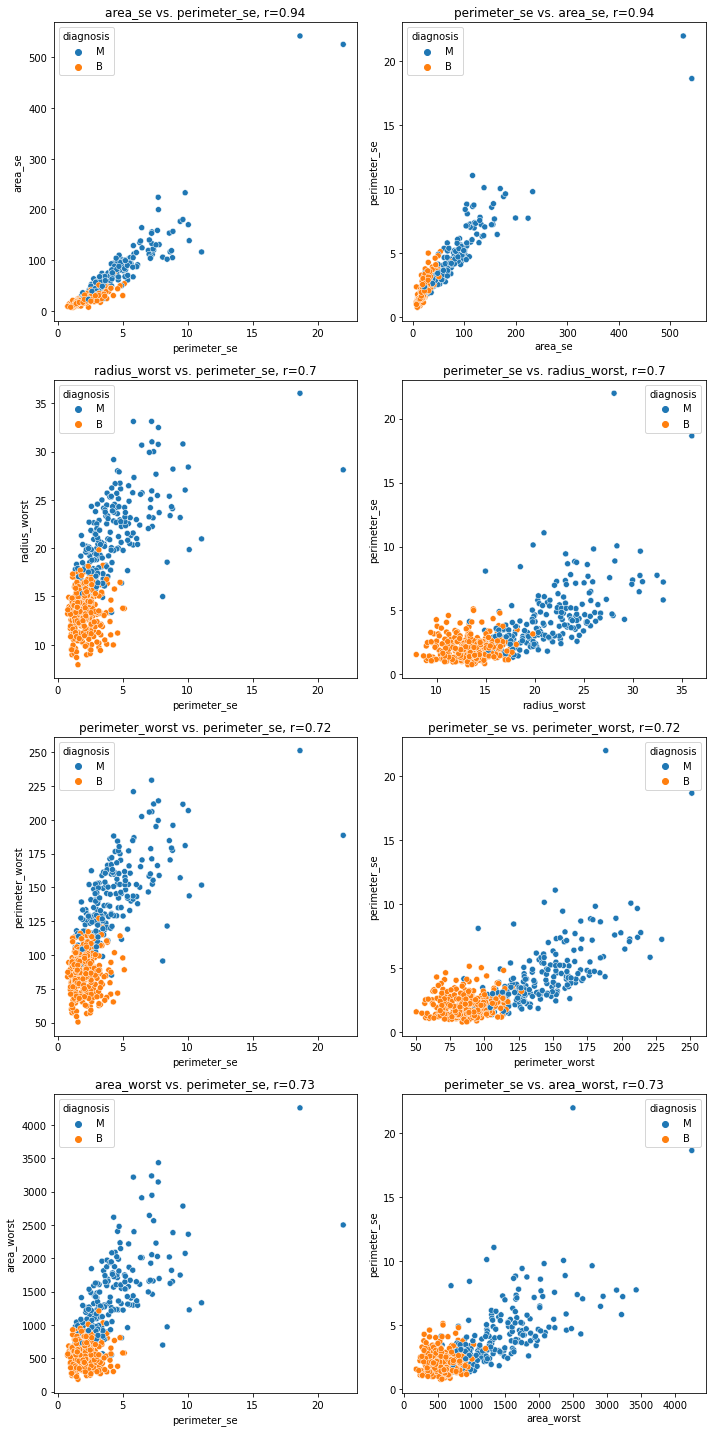

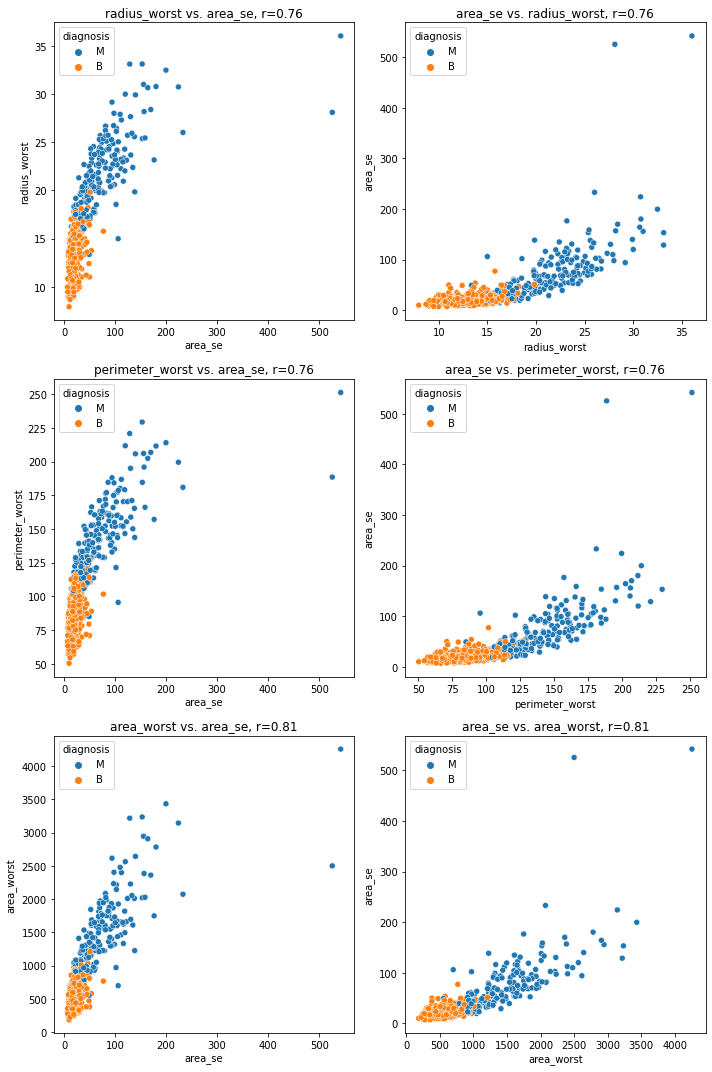

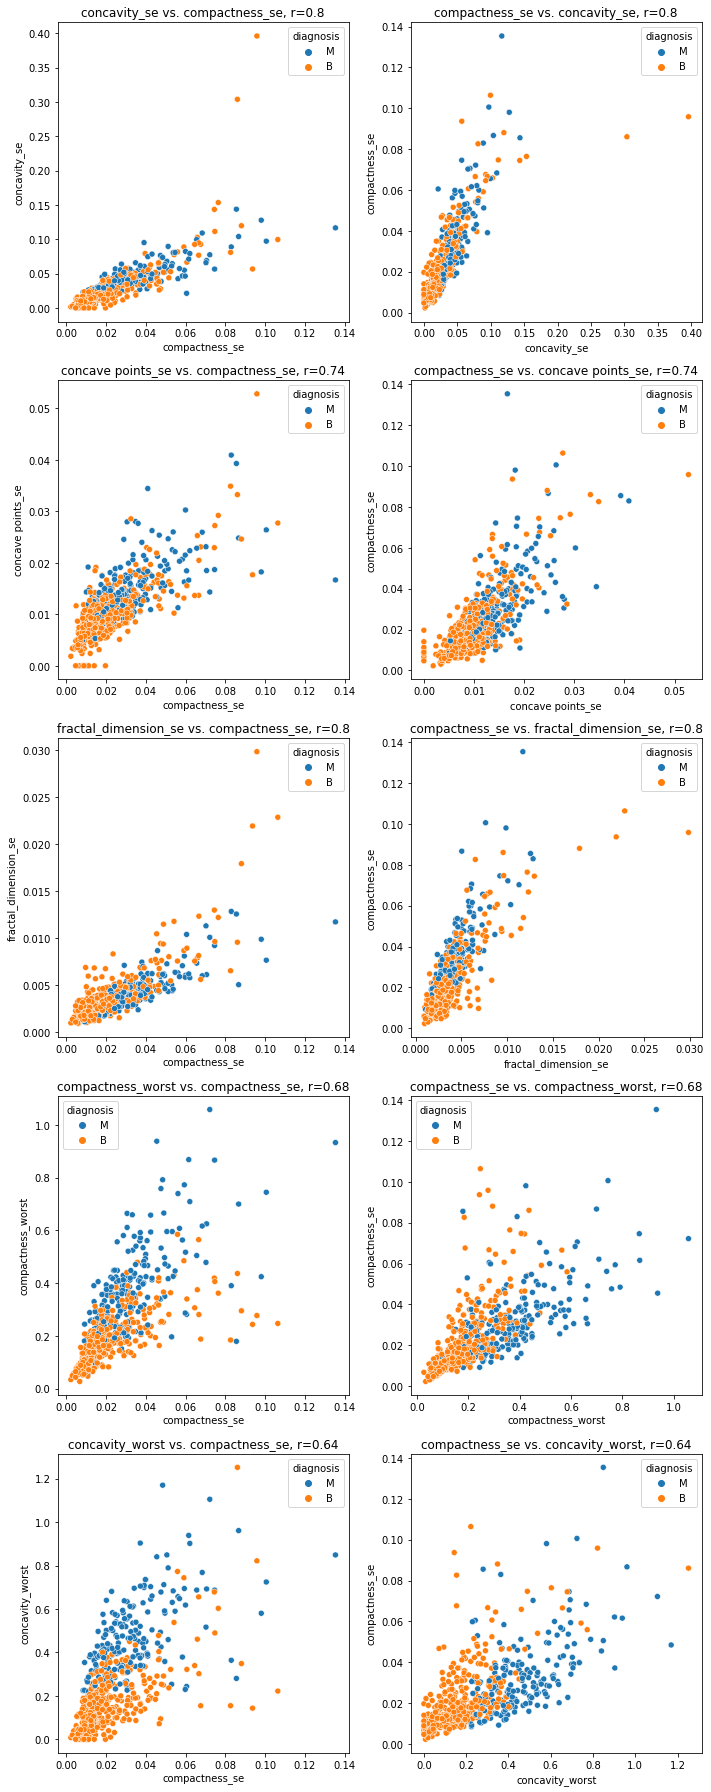

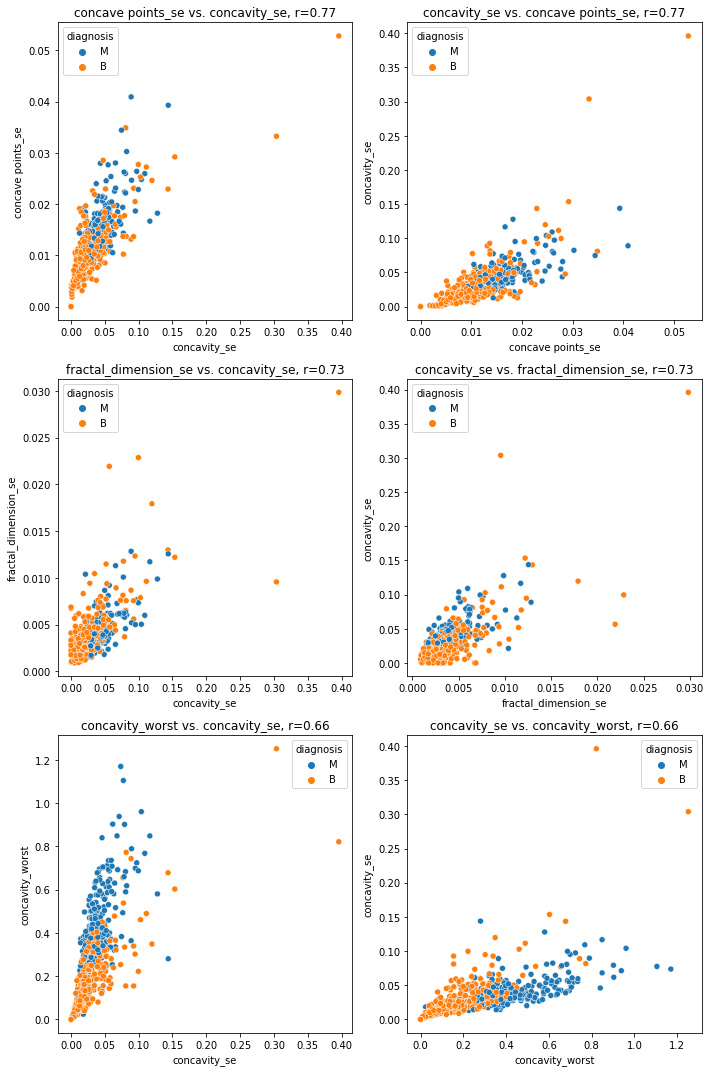

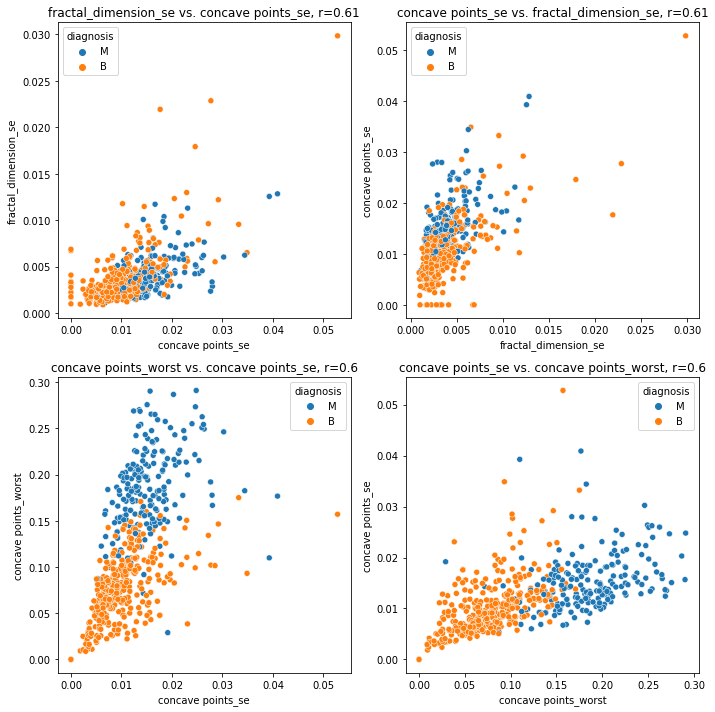

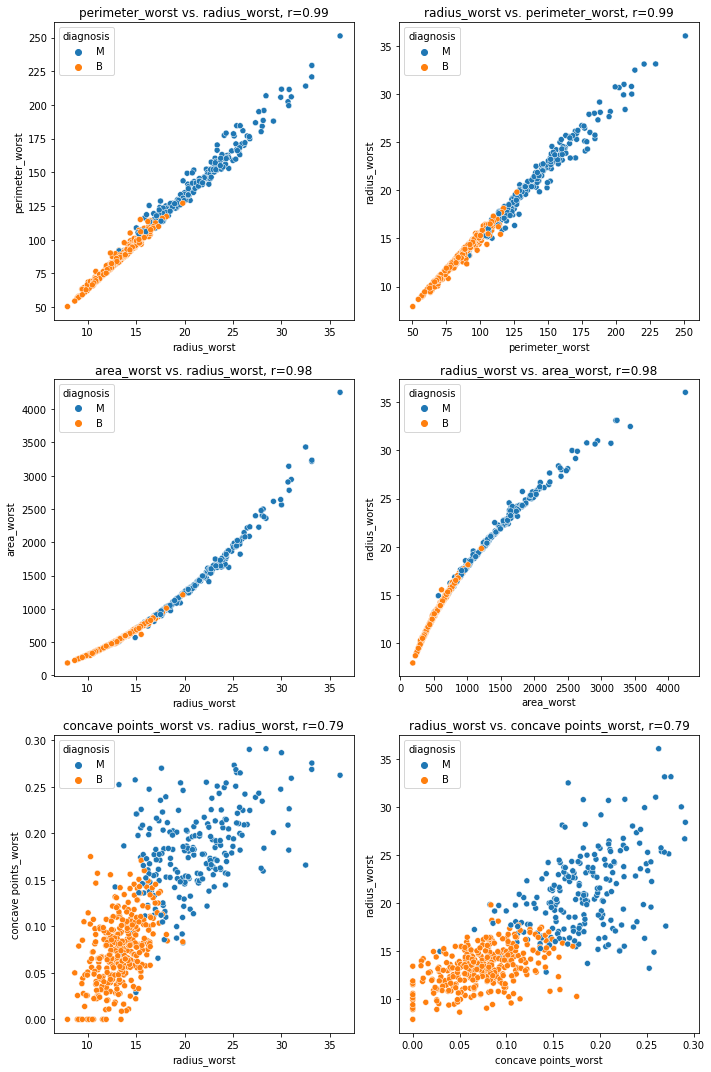

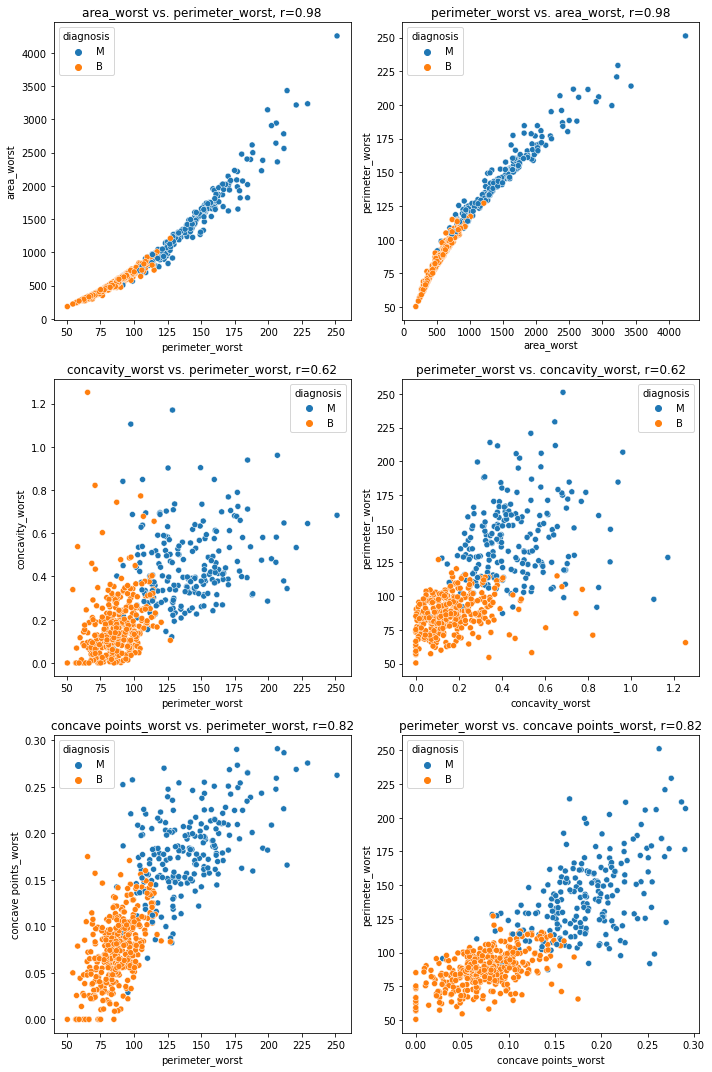

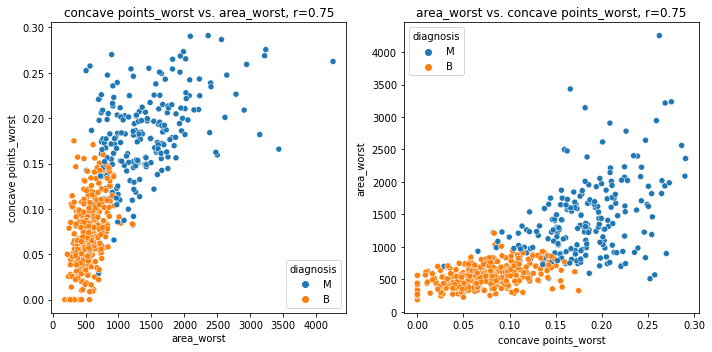

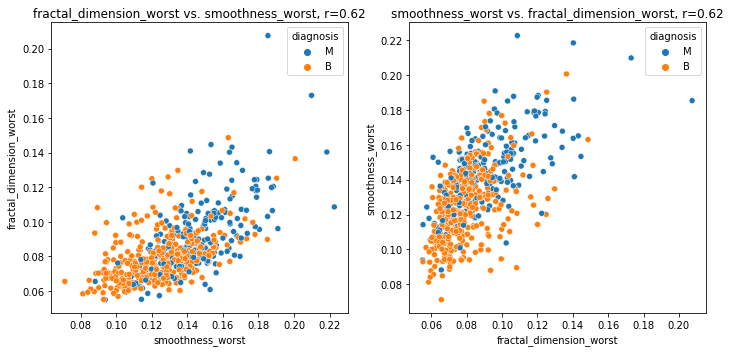

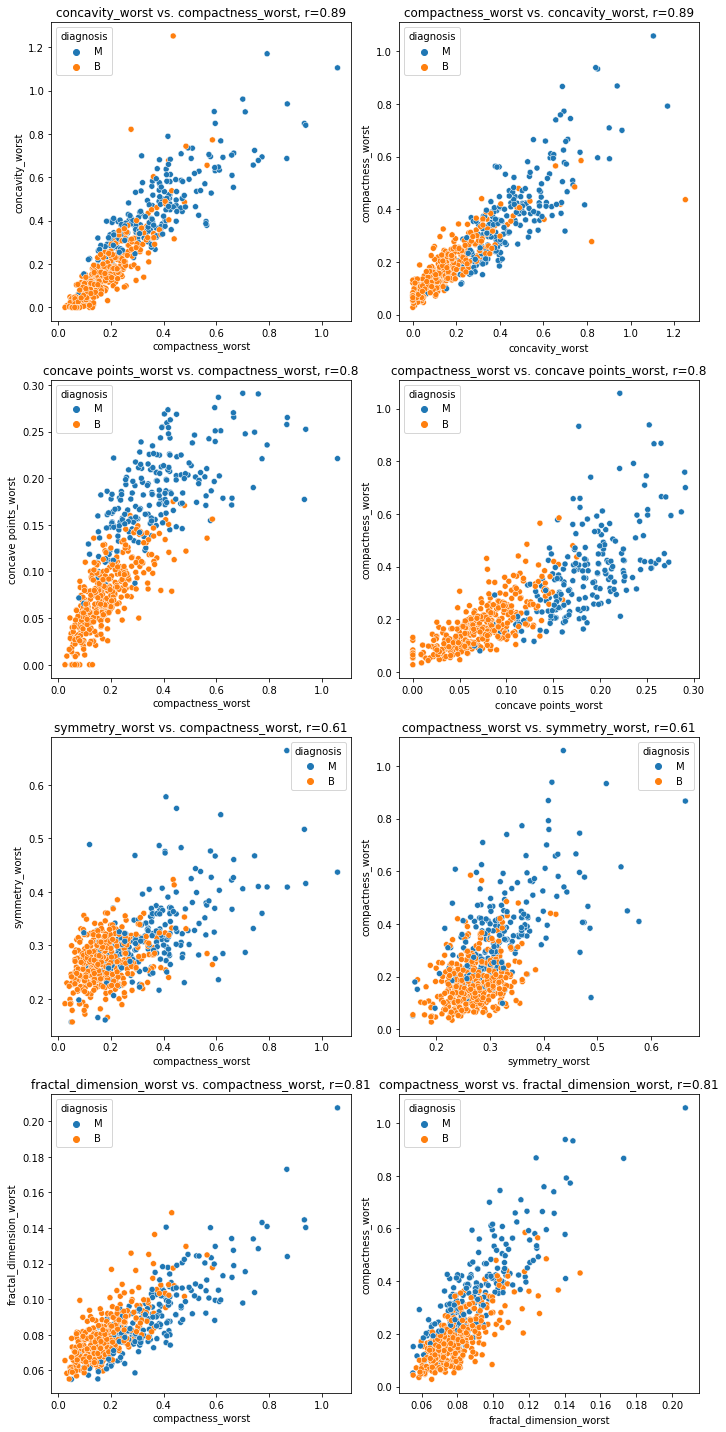

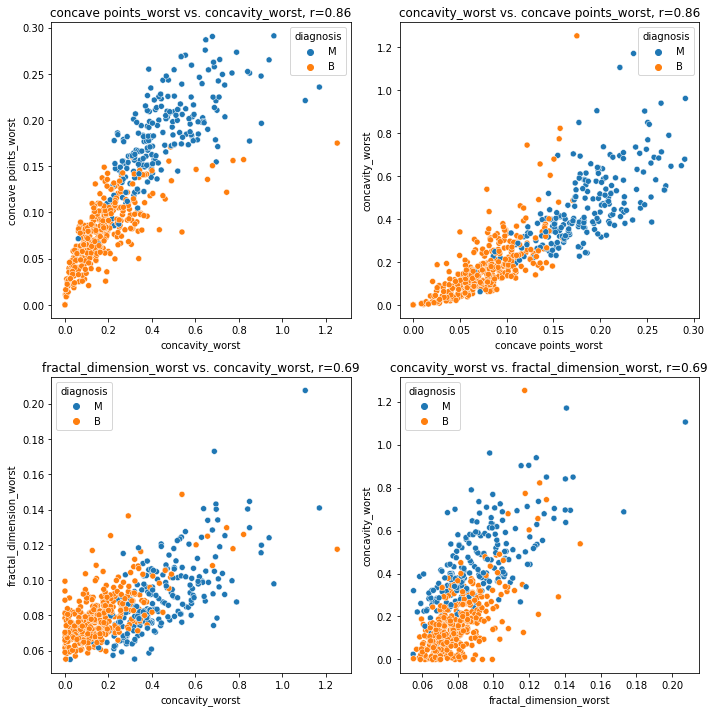

In [155]:
for key in high_corr.keys():
    ftrs = high_corr[key]
    # figure of size num of higly corr features x 2
    fig, axes = plt.subplots(len(ftrs), 2)
    if axes.ndim == 1:
        axes = axes.reshape((1,2))
    # Figure size
    fig.set_size_inches(2 * 5, axes.shape[0] * 5)
    # Plotting
    for ftr, ax in zip(ftrs, axes):
        # get correlation
        r = round(corr.loc[ftr, key], 2)
        # axes titles
        ax[0].set_title(f'{ftr} vs. {key}, r={r}')
        ax[1].set_title(f'{key} vs. {ftr}, r={r}')
        # create scatter plots
        sns.scatterplot(data=df, x=key, y=ftr, hue='diagnosis', ax=ax[0])        
        sns.scatterplot(data=df, y=key, x=ftr, hue='diagnosis', ax=ax[1])
    fig.tight_layout()
    plt.show()

Не для всех случаем зависимость линейная, например radius_mean и area_mean или  perimeter_mean и concave points worst

Теперь постоим boxplot для определения по каким признакам лучше всего отделять виды новообразований.

In [174]:
long_df.head()

id diagnosis   stat feature    value  feature_stat
0  842302         M   mean  radius  17.9900   radius_mean
1  842302         M     se  radius   1.0950     radius_se
2  842302         M  worst  radius  25.3800  radius_worst
3  842517         M   mean  radius  20.5700   radius_mean
4  842517         M     se  radius   0.5435     radius_se

In [173]:
long_df['feature_stat'] = long_df[['feature', 'stat']].agg('_'.join, axis=1)
from scipy.stats import zscore
norm_scaler = StandardScaler()
long_df.pivot_table()

ValueError: Must produce aggregated value

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 30)
box = sns.boxplot(data=long_df, y='feature_stat', x='value', hue='diagnosis')
box.set_xscale('log')
box.set
plt.show()

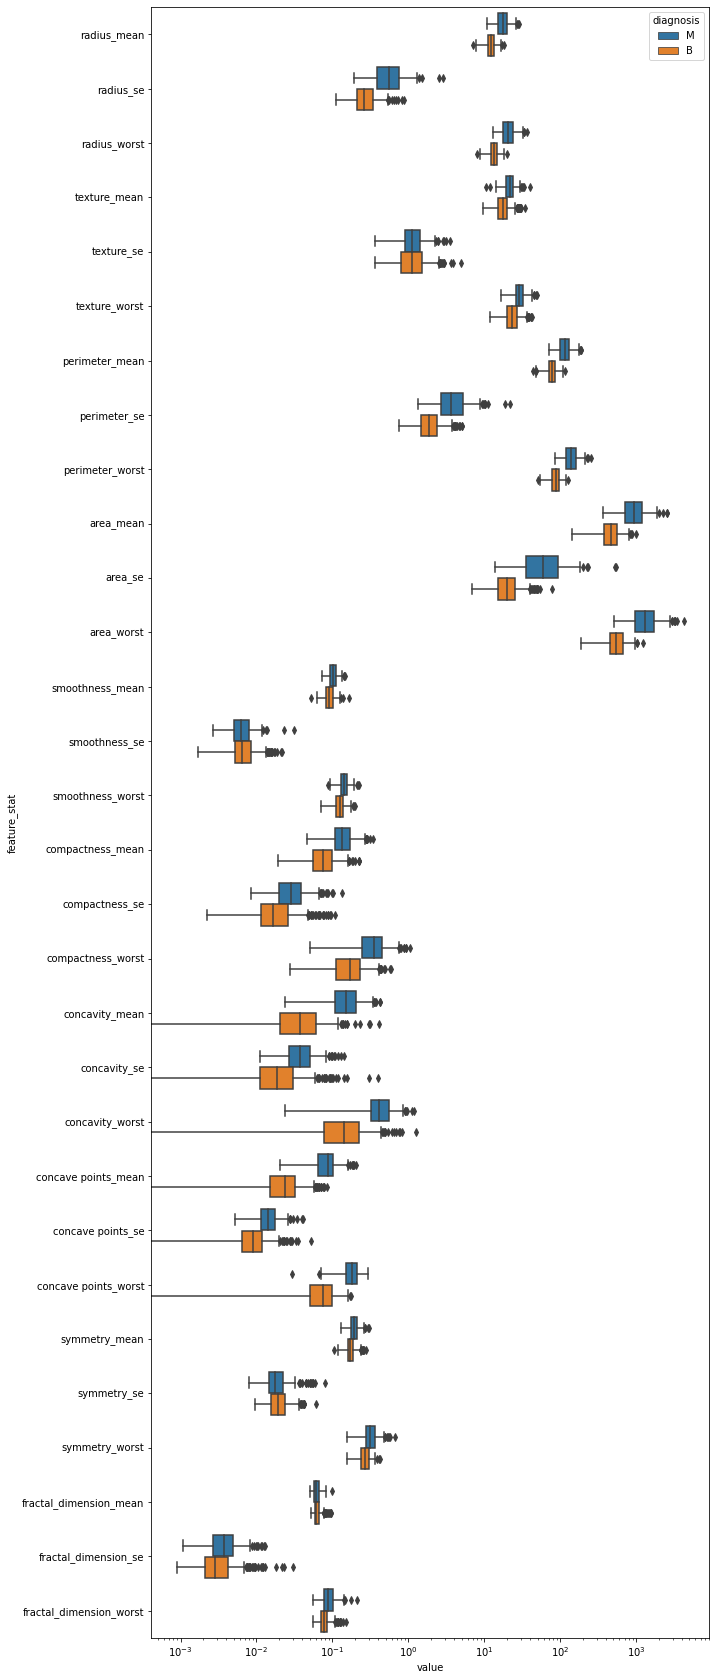

## KNN

## Logistic Regression